# Régression linéaire

On veut aller plus loin que la méthode des moindres carrés, et la généraliser aux cas de nombreuses variables. Ce problème est encore un problème d'optimisation de paramètres à partir d'une fonction de coût.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Notions abordées dans cette note

 - Généraliser les moindres carrés au cas multi-dimensionnel, aborder les cas non-linéaires
 - Comprendre l'écriture matricielle du problème de machine learning
 - Résoudre et programmer des écritures matricielles

## Qu'est ce qu'une régression linéaire ? 


Comme on l'a vu au [chapitre précédent](least_square), la régression linéaire consiste à faire passer une droite au plus près d'un ensemble de points aléatoires, qui semblent se répartir le long d'une droite. Ce protocole est assez ancien, et concernt toute (ou quasiment) la science. Dans ce cas, la stratégie est de mesurer un ensemble de donénes expérimentale, puis de vérifier que les variables ainsi mesurées sont corrélées entre elles : il existe une relation entre ces variables, qui prend la forme d'une droite $y = \alpha+\beta x$. On utilise donc la régression linéaire comme un outil (dé)montrant la relation supposée entre les variables.

On donne quelques exemples ci-dessous.

### Résistance électrique : cas strictement linéaire 

On veut prouver scientifiquement que la tension $U$ et le courant $I$ sont proportionnels avec le coefficient de proportionnalité $R$ appelé résistance, c'est-à-dire que $U=RI$. On mesure donc la tension $U$ et le courant $I$ un grand nombre de fois, et on les reporte sur un graphe, puis on applique la méthode des moindres carrés pour trouver la meileure droite de régression entre ces deux quantités. La pente de cette droite est la valeur mesurée de la résistance.

C'est exactement le cas du [chapitre précédent](least_square), donc on ne le détaille pas plus ici.

Ce cas est parfaitement linéaire puisqu'on veut montrer que les points expérimentaux suivent la loi $U=RI$ qui est de la forme $y=\beta x$. On en profite, depuis la méthode des moindres carrés, pour vérifier que l'ordonnée à l'origine est bien très proche de $0$ pour parfaitement vérifier la loi d'Ohm.

### Temps de demi-vie

On cherche à (dé)montrer que la décroissance d'une population au cours du temps est de la forme $\rho=\rho_{0}e^{-x/\lambda}$. Cette fois-ci, il faut tout d'abord rendre linéaire la relation. Par exemple, si $\rho$ et $\rho_0$ sont positifs, on peut calculer le logarithme de la relation précédente, ce qui nous donne $\ln\rho=\ln\rho_{0}-\frac{x}{\lambda}$ qui est bien de la forme $y=\alpha+\beta x$. 

On parle de cas pseudo-linéaire, car la linéarité est cachée.

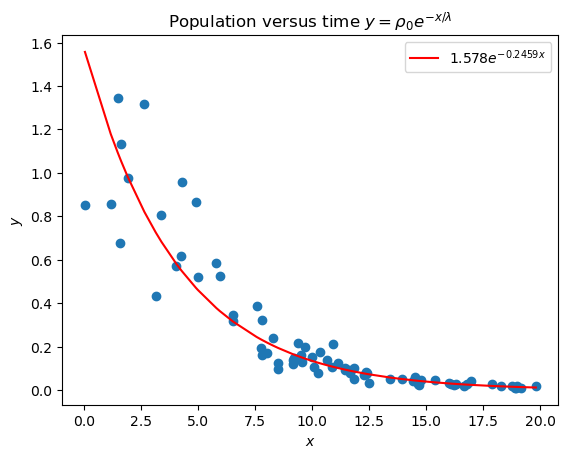

<Figure size 640x480 with 0 Axes>

In [2]:
N = 75 # sample size
x = 20*np.random.random(N)
x.sort()
epsilon = np.random.randn(N)/3

y = np.exp(0.5-x/4+epsilon)

lr = LinearRegression(fit_intercept=True) # intialise the model
lr.fit(x.reshape(-1,1), np.log(y).reshape(-1,1)) # fit the model
alpha = lr.intercept_[0] # catch the coefficients
beta = lr.coef_[0][0]
y_fit = np.exp(beta*x+alpha)

plt.scatter(x, y)
plt.plot(x, y_fit, 'r',
         label=r"$"+f"{np.exp(alpha):.4}"+r"e^{"+f"{beta:.4}"+r"x}$")
plt.title(r"Population versus time $y = \rho_0 e^{-x/\lambda}$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()
plt.clf()

## Rajouter des features pour les cas plus compliqués

Imaginons maintenant que l'on veuille faire une régression par la méthode des moindres carrés (c'est la fonction de coût de la régression linéaire) mais lorsque la fonction à représenter est de la forme $f\left(x\right)=\alpha+\beta x+\gamma x^{2}$, c'est-à-dire que l'on a maintenant trois paramètres que l'on veut trouver : $\alpha$, $\beta$ et $\gamma$, et le troisième est associé au carré de la variable à représenter. Et bien ce cas est à nouveau linéaire ! 

Pour s'en rendre compte, on suppose que les différentes puissances sont en fait différentes dimensions. En quelque sorte, on invente des variables, ici les variables $x_1$ et $x_2$, de sorte que la fonction que l'on cherche à tracer ait maintenant deux variables : 

$$
f\left(x\right)=\alpha+\beta x+\gamma x^{2}\rightarrow f\left(x_{1},x_{2}\right)=\alpha+\beta x_{1}+\gamma x_{2}
$$

On traite ensuite ces variables comme indépendantes, et on propose un modèle à deux variables $\tilde{y} \left(x_{1},x_{2}\right)=\alpha+\beta x_{1}+\gamma x_{2}$, dont on calcule les paramètres $\alpha$, $\beta$ et $\gamma$ minimisant la fonction de coût pour les $2N$ données $x_{1}^{i}$ et $x_{2}^{i}$.

$$
r=\frac{1}{2}\sum_{i=1}^{N}\left(\alpha+\beta x_{1}^{i}+\gamma x_{2}^{i}-f^{i}\right)^{2}
$$

avec $f^{i}$ les résultats disponibles pour les données.

La point important à remarquer ici est qu'il faut avoir _calculé_ les valeurs de la seconde variable $x_{2}\equiv\left(x_{1}\right)^{2}$ : on dit que l'on créé la _feature_ $x_{2}$ à partir des données. C'est un peu la même chose que dans l'exemple précédent, où on a construit l'information $\ln y$ pour pouvoir calculer les paramètres $\alpha$ et $\beta$ de la décroissance exponentielle.

Dans le cas général, la [génération de _features_ pertinentes à partir des données brutes](https://en.wikipedia.org/wiki/Feature_engineering) est un problème compliqué qui demande beaucoup de savoir faire et d'intuitions.

Plutôt que de traiter ce cas à la main comme on l'a fait précédemment, et obtenir les équations permetant de calculer les paramètres $\alpha$, $\beta$ et $\gamma$ du modèle de régression, on va tout de suite calculer les solutions du problème de la régression linéaire par la méthode des moindres carrés dans le cas d'un nombre quelconque de variables.

```{admonition} Données collectées versus exemples de test
:class: danger
Attention à ne pas se laisser berner par la pédagogie du programme proposé ici. Dans la réalité des cas, on ne sait pas du tout 
 - si la fonction $f$ existe
 - quelle est sa forme générique (comme ici $\left(x\right)=\alpha+\beta x+\gamma x^{2}\rightarrow$)

Ici, on construit des exmples de tests pour illustrer les méthodes qui ont permi de calculer les modèles de machine learning. On rajoute du bruit parfaitement contrôlé aux données calculées pour illustrer les difficultés potentielles des approches de machine learning, mais dans la pratique les problèmes sont beaucoup (beaucoup, beaucoup !) plus difficile à résoudre.
```

## Représentation matricielle du problème d'optimisation

Si l'on a $P$ paramètres, on posera pour modèle
$$
\tilde{y}^{i}=\alpha^{0}x_{0}^{i}+\alpha^{1}x_{1}^{i}+\alpha^{2}x_{2}^{i}+\cdots+\alpha^{P}x_{P}^{i}
$$

Il y a toujours $N$ représentations des données, et $P$ paramètres
(avant il y en avait seulement $2$ : $\alpha^{0}\equiv\alpha$ et $\alpha^{1}\equiv\beta$). Remarquons qu'on a inventé la variable $x_0$ qui est toujours égale à $1$, pour pouvoir traiter toutes les variables sous forme matricielle dans la suite.

Alors on représente l'ensemble des _targets_ $y$, des _features_ $x$ et des paramètres $\alpha$ sous la forme de matrices :

$$
\tilde{\mathbf{y}}=\mathbf{X}\cdot\boldsymbol{\alpha}
$$

$$
\mathbf{y}=\left(\begin{array}{c}
y^{1}\\
y^{2}\\
\vdots\\
y^{N}
\end{array}\right)\;\;;\;\;\mathbf{X}=\left(\begin{array}{ccccc}
x_{0}^{1} & x_{1}^{1} & x_{2}^{1} & \cdots & x_{P}^{1}\\
x_{0}^{2} & x_{1}^{2} & \cdots & \cdots & x_{P}^{2}\\
\vdots &  &  &  & \vdots\\
x_{0}^{N} & x_{1}^{N} & x_{2}^{N} & \cdots & x_{P}^{N}
\end{array}\right)\;\:;\;\;\boldsymbol{\alpha}=\left(\begin{array}{c}
\alpha^{0}\\
\alpha^{1}\\
\vdots\\
\alpha^{P}
\end{array}\right)
$$

Dans la matrice $\mathbf{X}$

 -  chaque ligne correspond à une cible/_target_
 -  chaque colonne correspond à une _feature_

## Régression linéaire et moindre carrés : généralisation à $P$ paramètres

 - La fonction de coût (ou de risque) de la méthode des moindres carrés s'écrit alors

$$
r\left(\mathbf{y},\tilde{\mathbf{y}}\right)=\frac{1}{2}\left(\mathbf{y}-\mathbf{X}\cdot\boldsymbol{\alpha}\right)^{T}\cdot\left(\mathbf{y}-\mathbf{X}\cdot\boldsymbol{\alpha}\right)
$$

et résoudre le problème de l'apprentissage du modèle linéaire revient encore une fois à trouver le minimum de la fonction de coût. Ce minimum se calcule alors ($\nabla$ est l'[opérateur gradient](https://en.wikipedia.org/wiki/Gradient))

$$
\nabla_{\alpha}r\left(\mathbf{y},\tilde{\mathbf{y}}\right)=\mathbf{0}\equiv\left.\frac{\partial r\left(\mathbf{y},\tilde{\mathbf{y}}\right)}{\partial\boldsymbol{\alpha}}\right|_{\boldsymbol{\alpha}=\hat{\boldsymbol{\alpha}}}=\mathbf{0}\Rightarrow\hat{\boldsymbol{\alpha}}=\left(\mathbf{X}^{T}\cdot\mathbf{X}\right)^{-1}\cdot\mathbf{X}^{T}\cdot\mathbf{y}
$$

 - On peut donc calculer tous les paramètres en une fois, si l'on sait inverser la matrice des données. En pratique l'inversion des matrices peut être faite dans des [librairies dédiée](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html), permettant un calcul optimisé.

En pratique, la régression linéaire dont la fonction de coût est quadratique est la _seule_ dont on sait calculer la solution exacte.

```{admonition} Démonstration
:class: dropdown
L'équation de minimisation s'écrit

$$
\begin{align}
\frac{\partial r\left(\mathbf{y},\tilde{\mathbf{y}}\right)}{\partial\boldsymbol{\alpha}}=\mathbf{0}&\Leftrightarrow-\frac{1}{2}\mathbf{X}^{T}\cdot\left(\mathbf{y}-\mathbf{X}\cdot\boldsymbol{\alpha}\right)-\frac{1}{2}\left(\mathbf{y}-\mathbf{X}\cdot\boldsymbol{\alpha}\right)^{T}\cdot\mathbf{X}=\mathbf{0}\\&\Leftrightarrow-\mathbf{X}^{T}\cdot\left(\mathbf{y}-\mathbf{X}\cdot\boldsymbol{\alpha}\right)=\mathbf{0}\\&\Leftrightarrow\boldsymbol{\alpha}=\left(\mathbf{X}^{T}\mathbf{X}\right)^{-1}\mathbf{X}^{T}\mathbf{y}
\end{align}
$$
peut se résoudre dans une écriture explicite. On a utilisé le fait que $\left(\mathbf{y}-\mathbf{X}\cdot\boldsymbol{\alpha}\right)^{T}=\mathbf{y}^{T}-\boldsymbol{\alpha}^{T}\cdot\mathbf{X}^{T}$. $\mathbf{M}^{T}$ représente la transposée de la matrice $\mathbf{M}$ (sans la transposée le risque n'est plus une fonction scalaire)

Notons que l'écriture $\mathbf{X}\cdot\boldsymbol{\alpha}$ peut être vue comme un produit matriciel si l'on considère l'ensemble des données $x^{i}$ comme constituant un espace vectoriel, ou comme un produit scalaire dans l'espace des paramètres en ne considérant qu'une seule observation $x^{i}$ de la variable aléatoire $X$.
```

In [3]:
def add_x0(x: np.array):
    """
    Add a first column of 1 on the data, in order to fit the regression coefficients.
    
    Parameters:
        x: a 2D numpy array, with data in columns (first argument of x.shape is the number of exmaples, second argument of x.shape is the number of features)
    
    Output:
        a numpy array, of shape (x.shape[0], x.shape[1] +1)
    """
    assert x.ndim == 2, "Input array must be of dimension 2"
    z = np.full(x.shape[0],1).reshape(x.shape[0],1)
    z = np.concatenate([z,x], axis=1)
    return z

def linear_regression(x: np.array, y: np.array):
    """Calculate the coefficients of the linear regression with least square method. The dimension of the problem is """
    assert x.ndim == 2, "Input features array must be of dimension 2"
    assert y.ndim == 1, "Input target array must be of dimension 1"
    assert x.shape[0] == len(y), "Number of examples and targets must be the same"
    x = add_x0(x)
    return np.linalg.inv(x.T @ x) @ x.T @ y

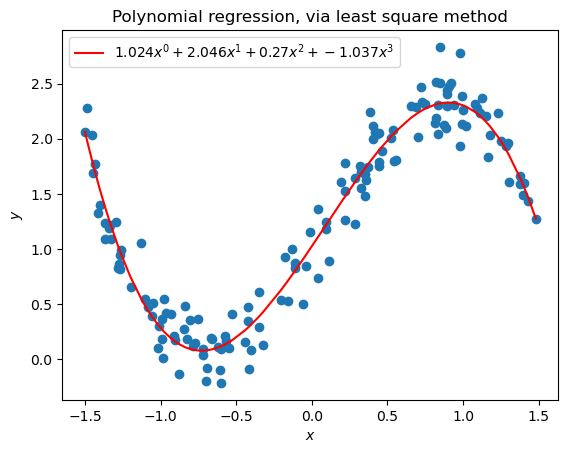

<Figure size 640x480 with 0 Axes>

In [4]:
N = 150 # sample size
x = 3*np.random.random(N)-1.5
nb_features = 3
x.sort()
epsilon = np.random.randn(N)/5

y = 1 + 2*x + 0.3*x**2 - x**3 + epsilon

# construct the features
features = np.concatenate([np.array(x**i).reshape(N,1) 
                           for i in range(1, nb_features+1)], 
                          axis=1)

# linear regression
alphas = linear_regression(features, y)

y_fit = sum(alphas[i]*x**i for i in range(len(alphas)))

title_string = " + ".join(f"{alphas[i]:.4}"+r"x^"+str(i) for i in range(len(alphas)))
plt.scatter(x, y)
plt.plot(x, y_fit, 'r',
         label=r"$"+title_string+r"$")
plt.title(r"Polynomial regression, via least square method")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()
plt.clf()

La librairie [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) permet bien évidemment de calculer la régression linéaire dans le cas à plusieurs _features_, de la même façon que pour la régression linéaire simple à une seule variable

In [5]:
lr = LinearRegression(fit_intercept=True) # intialise the model
lr.fit(features, y) # fit the model
betas = [lr.intercept_] + list(lr.coef_) # catch the coefficients
betas

[1.0244009448023244,
 2.0462480852433944,
 0.26997064841680696,
 -1.0373215669300546]

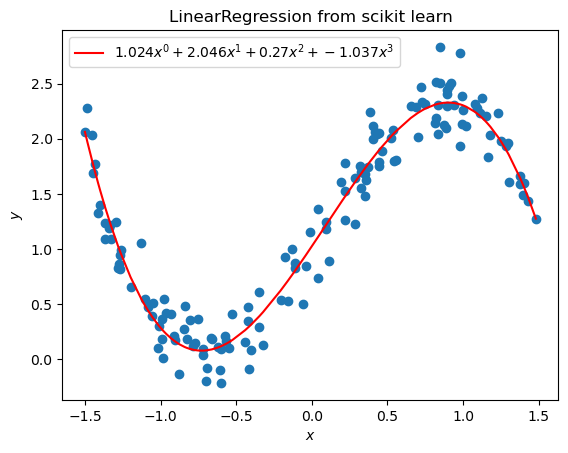

<Figure size 640x480 with 0 Axes>

In [6]:
y_fit = sum(betas[i]*x**i for i in range(len(betas)))

title_string = " + ".join(f"{betas[i]:.4}"+r"x^"+str(i) for i in range(len(betas)))
plt.scatter(x, y)
plt.plot(x, y_fit, 'r',
         label=r"$"+title_string+r"$")
plt.title(r"LinearRegression from scikit learn")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()
plt.clf()

## Cas multi-dimensionnel

On a illustré la régression linéaire à plusieurs paramètres dans le cas d'un polynôme d'ordre deux (la variable $x_2$ est supposée représenter le carré de $x$, ce que l'on appelle une [régression polynomiale](https://en.wikipedia.org/wiki/Polynomial_regression)), mais ces features peuvent en pratique représenter des dimensions réelles du problème. On peut par exemple chercher la relation linéaire entre trois variables $y$, $x_1$ et $x-2$ sous la forme $y = \alpha + \beta x_1 + \gamma x_2$ de façon complètement générique, sans nécessairement construire à la main les features à partir des données. Néanmoins, [représenter des données de plus de deux dimensions](https://en.wikipedia.org/wiki/Data_and_information_visualization) est un problème souvent compliqué, dont on ne s'embarasse pas ici.

## Compromis Biais-Variance

Combien de features donner à un modèle ? Dans le cas de a régression linéaire présentée ici, on peut tester le nombre de degrès de la variable $x$ à donner au modèle, et à comparer les différentes courbes obtenues.

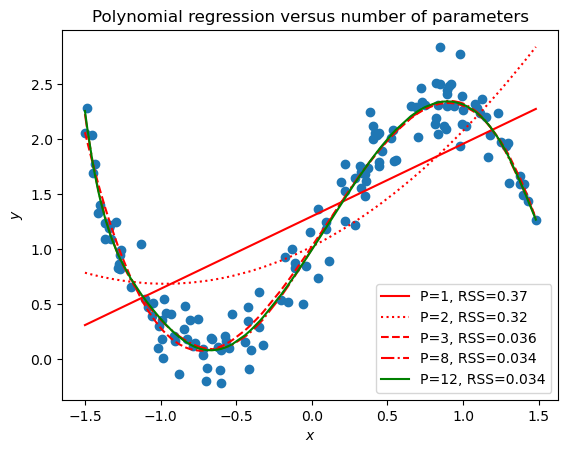

<Figure size 640x480 with 0 Axes>

In [7]:
y_fits = []
number_of_features = [1,2,3,8,12]
for nb_features in number_of_features:
    # construct the features
    features = np.concatenate([np.array(x**i).reshape(N,1) 
                               for i in range(1, nb_features+1)], 
                              axis=1)
    # linear regression
    alphas = linear_regression(features, y)
    y_fit = sum(alphas[i]*x**i for i in range(len(alphas)))
    y_fits.append(y_fit)

fig, ax = plt.subplots()
ax.scatter(x, y)
colors = ['red', 'green', 'darkorange', 'blue', 'gold']
linestyles = ['solid', 'dotted', 'dashed', 'dashdot']
for i in range(len(number_of_features)):
    rss = np.mean((y-y_fits[i])**2)
    ax.plot(x, y_fits[i], 
            color=colors[i//len(linestyles)%len(colors)],
            linestyle=linestyles[i%len(linestyles)],
            label=f"P={number_of_features[i]}, RSS={rss:.2}")
ax.set_title(r"Polynomial regression versus number of parameters")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
plt.show()
plt.clf()

On voit sur les courbes précédentes qu'augmenter le degrés maximum du polynôme des features une fois un certain seuil passé ne change pas grand chose. Cela est en fait trompeur, puisque cette propriétés vient du fait que l'on travaille ici sur des données bruitées de façon contrôlées. On a crée un jeu de données qui réponde parfaitement à la [meileure estimation possible via la méthode des moindres carrés](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#Continuous_distribution,_continuous_parameter_space), à savoir un polynôme d'ordre trois bruité par un bruit gaussien faible. De plus, on s'est contenté de représenter la donnée pour les points exéprimentaux. Si l'on recule un peu notre champs de vision

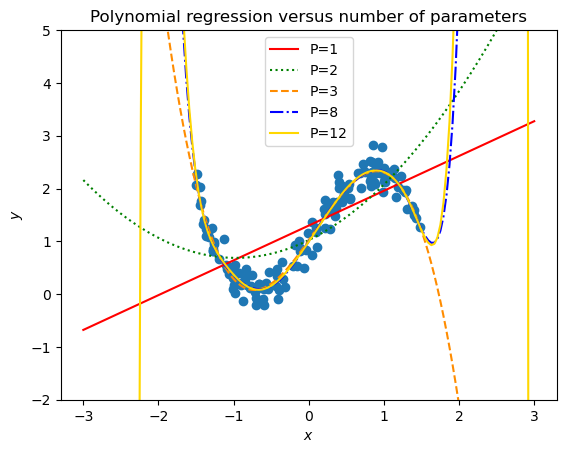

<Figure size 640x480 with 0 Axes>

In [8]:
x_fit = np.linspace(-3, 3, 150)
y_fits = []
number_of_features = [1,2,3,8,12]
for nb_features in number_of_features:
    # construct the features
    features = np.concatenate([np.array(x**i).reshape(N,1) 
                               for i in range(1, nb_features+1)], 
                              axis=1)
    # linear regression
    alphas = linear_regression(features, y)
    y_fit = sum(alphas[i]*x_fit**i for i in range(len(alphas)))
    y_fits.append(y_fit)

fig, ax = plt.subplots()
ax.scatter(x, y)
colors = ['red', 'green', 'darkorange', 'blue', 'gold']
linestyles = ['solid', 'dotted', 'dashed', 'dashdot']
for i in range(len(number_of_features)):
    ax.plot(x_fit, y_fits[i], 
            color=colors[i%len(colors)],
            linestyle=linestyles[i%len(linestyles)],
            label=f"P={number_of_features[i]}")
ax.set_title(r"Polynomial regression versus number of parameters")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_ylim(-2, 5)
ax.legend()
plt.show()
plt.clf()

on s'aperçoit que les courbes de régression sont de moins en moins prédictive en dehors des données connues expérimentalement. On dit que les modèle généralise moins.

Un autre aspect du problème peut être vu sur des données moins structurées. Reproduisons l'expérience d'augmenter le nombre de features pour des données parfaitement destructurées.

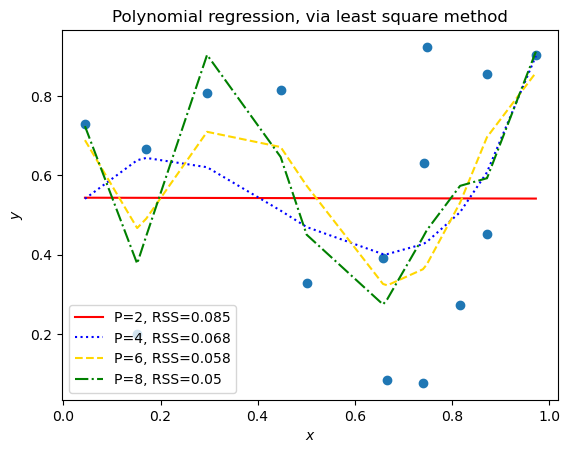

<Figure size 640x480 with 0 Axes>

In [9]:
N = 15 # sample size
x = np.random.random(N)
x.sort()  # for plot
y = np.random.random(N)

y_fits = []
nb_features_max = 9
for nb_features in range(1, nb_features_max, 2):
    # construct the features
    features = np.concatenate([np.array(x**i).reshape(N,1) 
                               for i in range(1, nb_features+1)], 
                              axis=1)
    # linear regression
    betas = linear_regression(features, y)
    y_fit = sum(betas[i]*x**i for i in range(len(betas)))
    y_fits.append(y_fit)

fig, ax = plt.subplots()
ax.scatter(x, y)
colors = ['red', 'blue', 'gold', 'green', 'darkorange']
linestyles = ['solid', 'dotted', 'dashed', 'dashdot']
for i in range((nb_features_max-1)//2):
    rss = np.mean((y-y_fits[i])**2)
    ax.plot(x, y_fits[i], 
            color=colors[i%len(colors)],
            linestyle=linestyles[i%len(linestyles)],
            label=f"P={2*(i+1)}, RSS={rss:.2}")
ax.set_title(r"Polynomial regression, via least square method")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
plt.show()
plt.clf()

On voit alors que les degrés d'ordre supérieurs semble mieux _passer par les points expérimentaux_. On l'illustre par la somme des carrés résiduels, qui dimininue avec la compléxité du modèle. Si cette intuition est correcte, augmenter la complexité du problème pose le problème de la généralisation que l'on a vu précédemment. Ici évidemment, le problème de la généralisation est un peu outrancier, puisque les données sont volontairement déstructurées. Dans tous les cas, augmenter la complexité du modèle pour mieux prendre en compte les exemples constitue un sorte de sur-apprentissage. ce phénomène dit d'_overfit_ représente un [compromis entre biais et variance](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff). 

Le mécanisme inverse d'_underfit_ (ou sous-apprentissage) est représenté par les tentatives de passer tous les points par une droite de régression ($P=1$ dans les illustrations) alors que les données sont clairement plus complexes que cette simple approximation. C'est l'aurte dilemne du compromis biais-variance : tâcher de n'être ni sous-représentatif (sous-apprentissage, _underfit_) des données et ne pas en capturer la complexité intrinsèque, ni sur-représentatif (sur-apprentissage, _overfit_) et avoir du mal à généraliser.

## Pour aller plus loin

La [méthode des moindres carrés](https://en.wikipedia.org/wiki/Ordinary_least_squares) représente la [meilleure estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) (au sens de la statistique fréquentiste) d'une courbe polynomiale bruitée par un bruit gaussien.

On peut insérer la structure linéaire $\mathbf{X}\cdot\boldsymbol{\alpha}$ dans une fonction non-linéaire. C'est ce que l'on va voir dans le [chapitre suivant](logistic_regression) sur la régression logistique. On peut également regarder les [méthodes à noyaux](https://en.wikipedia.org/wiki/Least-squares_support_vector_machine).